<a href="https://colab.research.google.com/github/harishgawade1999/Playstore-App-Review-Analysis-/blob/main/Team_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Play Store, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. Applications are available through Play Store either free of charge or at a cost. They can be downloaded directly on an Android device through the proprietary Play Store mobile app.

We are provided with the two datasets one containing the information about apps and the other consist of the user reviews and their sentiments about the apps. Our goal is to analyze the dataset and visualize the trends and relations between app features. There are many questions an app developer could come across while developing an app and our study will help in answering those questions. Our analysis is divided into three phases; understanding data, data preparation and data visualization.

This will involve various steps:

*   **Loading the dataset as dataframe**
*   **Cleaning and preparing the data**
*   **Extracting essential data from the dataset**
*   **Exploratory analysis and visualizations**
*   **Conclusion**

Let us start with importing the required libraries and datasets.

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# defining the directory path where the data is stored
directory_path = "/content/drive/MyDrive/Playstore Dataset/"

In [ ]:
# loading the dataset as a pandas dataframe
raw_apps_df = pd.read_csv(directory_path + "Play Store Data.csv")
raw_reviews_df = pd.read_csv(directory_path + "User Reviews.csv")

In [ ]:
# copying the dataframe
apps_data = raw_apps_df.copy()

# **Discover and assess the data**

To perform any operation on dataset, it's vital to be familiar with dataset. Depending on size and type of data, understanding and interpreting data sets can be challenging. Let us first have a look at the structure of the dataset and understand how the data is organized.



In [ ]:
# taking a glimpse of top 5 rows
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# last 5 rows
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# checking the shape of dataset
apps_data.shape

(10841, 13)

In [ ]:
# looking at the columns
apps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### <b>*Insight of the data set*</b>

It’s important to know the different types of data/variables in the given dataset. There are different types of data present in the dataset like float, object, string. There are categorical variables as well as numeric variables present in the dataset.

We can observe that, our dataset contains the data of about 10841 apps found on the play store.

Dataset has 13 columns which are the parameters of the apps. Let's look at each column -

*   **App** - name of the app
*   **Category** - category of the app
*   **Rating** - app's rating by the users out of 5
*   **Reviews** - number of the app's reviews
*   **Size** - size of the app
*   **Installs** - number of installs of the app
*   **Type** - whether the app is free or paid
*   **Price** - price of the app in $
*   **Content Rating** - target audience of the app
*   **Genres** - genre of the app
*   **Last Updated** - date the app updated last time
*   **Current Ver** - current version of the app
*   **Android Ver** - android version required to run the app

After getting familliar with the dataset we should prepare our data and look for the missing and duplicate values. Detecting and treating/removing such values helps in efficient analysis, limits errors and inaccuracies.



# **Data Preparation**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is the most important step. Good data preparation allows for efficient analysis, limit errors and inaccuracies that can occur to data during processing.

## **Handling missing data**

Cleaning up the data is traditionally the most time consuming part of the data preparation process, but it’s crucial for removing faulty data and filling in gaps.
Missing values are caused by incomplete data. It is important to handle missing values effectively, as they can lead to inaccurate inferences and conclusions.

**Starting with checking for duplicates and missing values.**

In [ ]:
# checking for duplicates
apps_data["App"].duplicated().any()

True

In [ ]:
# droping duplicates
apps_data.drop_duplicates("App", inplace=True)

In [ ]:
# shape after droping duplicates
apps_data.shape

(9660, 13)

In [ ]:
# checking the columns which have missing values
columns_with_missing_values = apps_data.columns[apps_data.isnull().any()]
apps_data[columns_with_missing_values].isnull().sum()

Rating            1463
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

**Yep, we do have missing values.**

Looking at number of missing values above, we notice that the **Rating** column has a lot of missing values in it. The other columns do have missing values but they are less than 10.

Let us analyze features one by one so we can figure out why the data is missing. This is the point at which we get into the part of data science. It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, we'll need to use our intution to figure out why the value is missing.

Let's start with column **Type** 

In [ ]:
# looking at missing values in column Type
apps_data[apps_data['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There is only one missing value. These value is probably missing because it is not recorded, rather than because it doesn't exist. So, it would make sense for us to try and guess what it would be rather than just leaving it as NaN.

After cross-checking in the dataset the app's price is 0 it means the missing value should be '*Free*', so filling the missing value.

In [ ]:
# filling missing data in city column
apps_data['Type'].fillna('Free', inplace= True)

In [ ]:
# looking at missing values in column Content Rating
apps_data[apps_data['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Looking at missing value we cannot conclude why this data is missing. It seems that values in the row are recorded in wrong column i.e starting from Category column the value of next column is recorded in previous column.It means value in Category column is missing and we can not figure out it's value so better idea will be to drop the row.

In [ ]:
# droping the missing value row
apps_data.dropna(subset=['Content Rating'], inplace= True)

Sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns ***Android Ver*** and ***Current Ver*** doesn't make any sense to us so we just dropped for this instance.


In [ ]:
# droping unnecessary columns
apps_data.drop(columns=['Android Ver','Current Ver'], axis= 1, inplace= True)

Now looking at the missing values of **Rating** column. There are 1463 values which are missing. This ratings are given by the users, so we cannot predict anything to fill.

Let's see the distribution of the ratings.

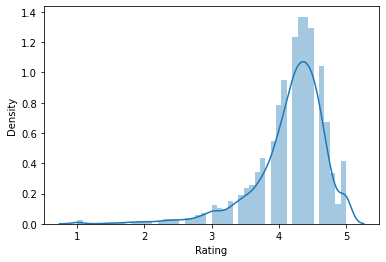

In [ ]:
# plot distribution of rating
sns.distplot(apps_data['Rating']);

The distribution of the rating interprets negatively skewed distribution as more values are concentrated towards the right side of the plot. In skewed distributions, the **median is the best measure** because it is unaffected by extreme outliers or non-symmetric distributions of scores.

 We can replace the missing values with the median value of the column.

In [ ]:
# calculating median value
median_value = apps_data['Rating'].median()

In [ ]:
# replacing the missing values with median value
apps_data['Rating'].fillna(median_value, inplace= True)

In [ ]:
# checking the count of missing values
apps_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

All the columns have null count zero it means the dataset doesn't contain any missing values.

Now our dataset is cleaned and we can start preparing our dataset.

## **Transforming Data**

Transforming data is the process of updating the format or value entries in order to reach a well-defined outcome, or to make the data more easily understood.

In [ ]:
# checking data types
apps_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

Columns like Reviews, Size, Installs, Price are of object type so  we can change their data type to integer/float. 

Let's start with changing **Reviews** column from object to integer.

In [ ]:
# changing data type of column Reviews
apps_data['Reviews'] = apps_data.Reviews.astype(int)

Now changing the type of the **Size** column. First looking at the unique values in the column.

In [ ]:
# checking unique values in Size column
apps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

**Size** column contain characters M and K which denotes MB and kB so we will remove M and convert kB to MB by replacing K with e-3. 

There are some apps whose size varies with device in which they are installed so we cannot predict there size or replace them with mean or median as some have small and some very large size. It will be better to drop that rows with varies with devices in **Size** column.

In [ ]:
# removing M and replacing K with e-3
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('M', ''))
apps_data['Size'] = apps_data['Size'].apply(lambda x: x.replace('k', 'e-3'))
apps_data = apps_data[apps_data['Size'] != 'Varies with device']

# changing the type of Size column
apps_data['Size'] = apps_data['Size'].astype(float)

To change the type of **Installs** column first we have to remove the special character **'+'** and **','** from the values.

In [ ]:
# removing special characters
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace('+', ''))
apps_data['Installs'] = apps_data['Installs'].apply(lambda x: x.replace(',', ''))

# changing the type of Installs column
apps_data['Installs'] = apps_data['Installs'].astype(int)

Now changing the type of **Price** column to float. First, we have remove the special character **'$'**.

In [ ]:
# removing $ and changing the type of Price column
apps_data['Price'] = apps_data['Price'].apply(lambda x: x.replace('$', ''))
apps_data['Price'] = apps_data['Price'].astype(float)

Now looking at the **last updated** column it contains the date on which the app is updated/launched last time. It is of object type so we have to convert date in the date-time format.

In [ ]:
# converting 'date' dtype from object to datetime
def get_date(date_string):
  date_obj = datetime.strptime(date_string, '%B %d, %Y').date()
  date_obj = pd.to_datetime(date_obj, format="%Y-%m-%d")
  return date_obj

apps_data['Last Updated'] = apps_data['Last Updated'].apply(get_date)

## **Final look at the dataset**

In [ ]:
# reseting the index
apps_data.reset_index(drop= True, inplace= True)

In [ ]:
# top 5 rows
apps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [ ]:
# last 5 rows
apps_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8427,FR Forms,BUSINESS,4.3,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29
8428,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25
8429,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06
8430,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20
8431,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25


In [ ]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8432 non-null   object        
 1   Category        8432 non-null   object        
 2   Rating          8432 non-null   float64       
 3   Reviews         8432 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        8432 non-null   int64         
 6   Type            8432 non-null   object        
 7   Price           8432 non-null   float64       
 8   Content Rating  8432 non-null   object        
 9   Genres          8432 non-null   object        
 10  Last Updated    8432 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 724.8+ KB


In [ ]:
# descriptive Statistics
apps_data.describe()

,Rating,Reviews,Size,Installs,Price
count,8432.000000,8.432000e+03,8432.000000,8.432000e+03,8432.000000
mean,4.183847,1.206553e+05,20.395289,3.724212e+06,1.225972
std,0.513070,9.363450e+05,21.827542,2.482940e+07,18.028685
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,1.700000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,4.755000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,1.566725e+04,28.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


### **Observation:**


*   After cleaning we have dataset of shape **8432 apps** and **11 columns**.
*   There are no missing values now and columns have their respective data types.
*   Rating for apps given by users is out of 5 having **average rating of 4.18**.
*   Max size of app is 100 MB. There were apps with size varying with device which would have size more than 100 MB but we could not predict their size thats why we had to drop them.
*   There are apps which are installed more than 1 billion times and some apps are not intalled single time also. The **average installs is 3.72e6 times**.
*   There are less paid apps as compare to free apps and maximum price paid app have is $400.

**We can now explore the dataset and perform analysis.**


# **Data Insights**

Now it is time to unveil the real strength of data analysis, i.e., to get an insight, and learn the trend, pattern and get answers to some of the questions related to the dataset.

## **How is the app rating distributed?**

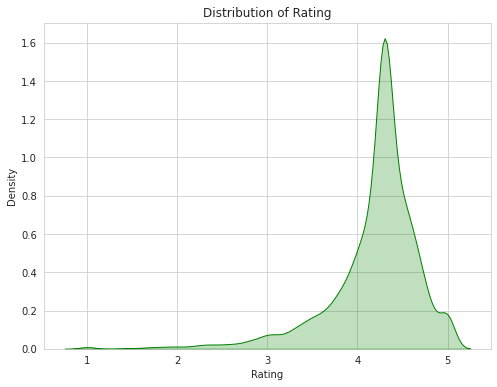

In [ ]:
# setting plot size and background
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')

# distribution plot
sns.kdeplot(apps_data.Rating, color="Green", shade = True)
plt.title("Distribution of Rating");

In [ ]:
# average rating
avg_rating = apps_data["Rating"].mean()
print(f"Overall average rating is {round(avg_rating,2)}")

Overall average rating is 4.18


### **Observation:**
* Average rating of applications in play store is around 4.18, which is quite high.
*  Most of the ratings are above 3.5 which means most of the apps are being liked by the users. 

* **We can say that rating can be a variable to identify app success.**


## **How many apps are there in each category?**

In [ ]:
# prepare data and sort
category_df= apps_data['Category'].value_counts().reset_index().rename(
              columns={'index':'Category', 'Category':'Total_apps'})

sorted_df= category_df.sort_values(by=["Total_apps"], ascending=True)

In [ ]:
# checking count of categories
print(f"Number of categories in play store: {category_df.shape[0]}")

Number of categories in play store: 33


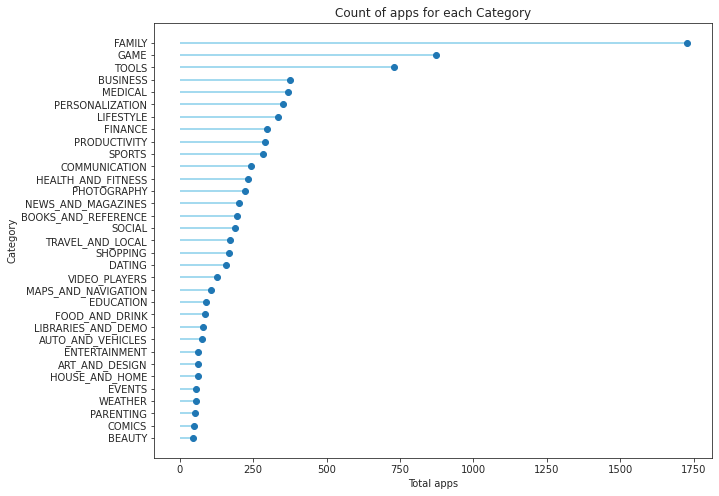

In [ ]:
# setting plot size and background
plt.figure(figsize=(10,8))
sns.set_style('ticks')

# lollipop plot
plt.hlines(y=sorted_df["Category"], xmin=0, 
           xmax=sorted_df["Total_apps"], color="skyblue")
plt.plot(sorted_df["Total_apps"],sorted_df["Category"], "o")

# setting title and labels
plt.title("Count of apps for each Category")
plt.xlabel("Total apps")
plt.ylabel("Category");

### **Observation:**
* There are 33 categories present in play store.

* Family category is at the top having highest number of apps nearing 1750 apps.

* Game and Tools categories are behind Family category having more than 750 apps.
* We can say that apps in Family and Game category are common and have high chances of being successful.

## **Which category apps are installed most?**

In [ ]:
# prepare data and sort
temp1_df = apps_data.groupby('Category').agg(
                            {'App':'count','Installs':'sum'}).reset_index()
                            
temp1_df['Avg_Installs'] = temp1_df.apply(lambda x: x['Installs']/x['App'], axis=1)
temp1_df.sort_values('Avg_Installs', ascending=False, inplace=True)

In [ ]:
# check data
temp1_df.head()

,Category,App,Installs,Avg_Installs
14,GAME,873,11532464253,1.321015e+07
9,ENTERTAINMENT,64,637960000,9.968125e+06
6,COMMUNICATION,242,1817943051,7.512161e+06
31,VIDEO_PLAYERS,127,866767720,6.824943e+06
24,PHOTOGRAPHY,222,1493897655,6.729269e+06


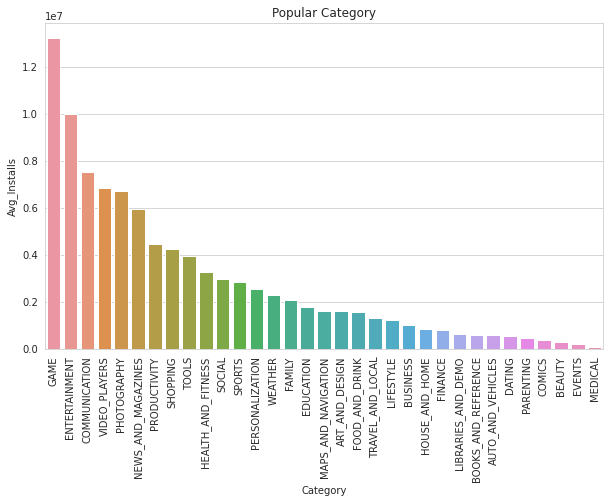

In [ ]:
# setting plot size and background
plt.figure(figsize= (10,6))
sns.set_style("whitegrid")

# bar plot
sns.barplot(data= temp1_df, x="Category", y="Avg_Installs")

# setting title and label
plt.title("Popular Category")
plt.xticks(rotation=90);

### **Observation:**

* We saw that Family category has high number of apps but when it comes to installs Game is the most popular category.

* Entertainment, Communication, Video players, Photography categories are also popular among smartphone users.

* Medical category has least number of installs and it's interesting that it has more number of apps than many other categories which has more installs.

## **Which age groups do different categories target?**

In [ ]:
# prepare data to get count of apps per Category and Content Rating
df1 = apps_data.groupby(["Category", "Content Rating"]).count().reset_index()
df1 = df1[["Category", "Content Rating", "App"]]
temp2_df = df1.pivot(columns="Content Rating", index="Category", values="App")

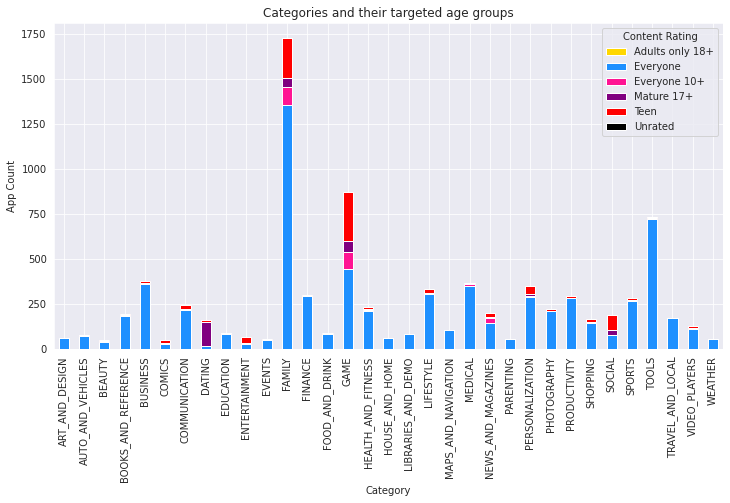

In [ ]:
# setting plot background
sns.set_style("darkgrid")

# bar chart
color_lst = ["gold", "dodgerblue", "deeppink", "purple", "red", "black"]
temp2_df.plot(kind="bar", stacked=True, color= color_lst, figsize=(12,6))

# setting label and title
plt.ylabel("App Count")
plt.title("Categories and their targeted age groups");

### **Observation:**


*   Every Category targets almost all age group audiences.

*   Dating Category has over 90% of apps mostly for Mature audience.

*   Family and Game categories have high number of apps so they contain more apps which are rated for teen and mature audiences.

* Categories such as Tools, Finance, Books and Reference, Education, Weather mostly targets everyone.






## **What percentage of apps are paid?**

In [ ]:
# data to plot
data = apps_data['Type'].value_counts()

# displaying free and paid apps
print(f"Number of free apps:{data['Free']}")
print(f"Number of paid apps:{data['Paid']}")

Number of free apps:7747
Number of paid apps:685


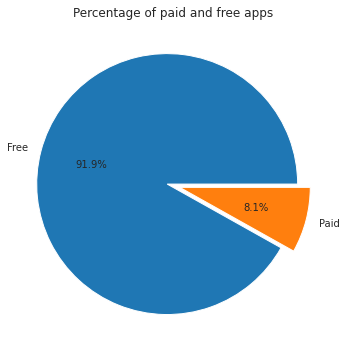

In [ ]:
# Pie Chart
plt.figure(figsize=[10,6])

labels = data.keys()
plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*2)
plt.title("Percentage of paid and free apps");

### **Observation:**

* From the above chart, we can see that 91.9% of apps in the play store dataset are free apps and 8.1% apps are paid.

* There are very less paid apps as compare to free apps.


## **Which type of apps are users willing to pay for?**

In [ ]:
# extracting paid apps data
paid = apps_data[apps_data["Type"] == "Paid"]
paid_apps = paid.groupby("Category")["Type"].value_counts().unstack().reset_index()

In [ ]:
# merging dataframes
category_df.sort_values(by="Category", inplace=True)
category_df= category_df.merge(paid_apps, on='Category', how='outer')
category_df.fillna(value=0, inplace=True)

In [ ]:
# getting category wise paid apps percentage
category_df['%_of_paid_apps'] = category_df.apply(lambda x: 
                                round(100*x['Paid']/x['Total_apps'],2), axis=1)

In [ ]:
# display data
category_df.head()

,Category,Total_apps,Paid,%_of_paid_apps
0,ART_AND_DESIGN,62,3.0,4.84
1,AUTO_AND_VEHICLES,75,2.0,2.67
2,BEAUTY,47,0.0,0.00
3,BOOKS_AND_REFERENCE,194,27.0,13.92
4,BUSINESS,376,11.0,2.93


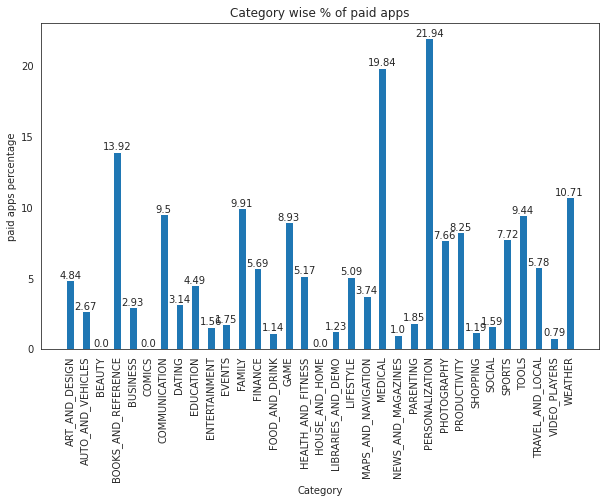

In [ ]:
# setting plot size and background
plt.figure(figsize=(10,6))
sns.set_style("white")

# bar plot
plt.bar(category_df['Category'], category_df['%_of_paid_apps'], width=.5)

for i, val in enumerate(category_df['%_of_paid_apps'].values):
    plt.text(i, val, float(val), horizontalalignment='center',
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

plt.title('Category wise % of paid apps')
plt.xlabel('Category')
plt.ylabel('paid apps percentage')
plt.xticks(rotation=90);

### **Observation:**


*   Personalization and Medical category have high rate of paid apps as compared to other categories having approximately 22% and 20% of their total apps are paid. Books and Reference category is behind them.

*    We can say that this type of apps generally do well as paid apps, since value is in the apps functionality.

*   Beauty, Comics and House and home categories do not have any paid app.

## **Do paid apps get better rating?**

In [ ]:
# getting the data to plot
free_apps_rating = apps_data[apps_data['Type'] == "Free"]['Rating']
paid_apps_rating = apps_data[apps_data['Type'] == "Paid"]['Rating']

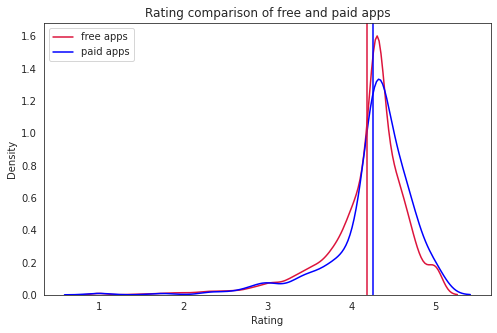

In [ ]:
# setting plot size and background
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))

# average ratings
meanx = free_apps_rating.mean()
meany = paid_apps_rating.mean()

# Distribution plot 
ax = sns.kdeplot(free_apps_rating, shade=False, color='crimson')
ax = sns.kdeplot(paid_apps_rating, shade=False, color='blue')

# ploting average lines
plt.axvline(x = meanx, color = 'crimson', label = 'free apps')
plt.axvline(x = meany, color = 'blue', label = 'paid apps')

# set title and legend
plt.title("Rating comparison of free and paid apps")
plt.legend(loc = 'upper left');

In [ ]:
# Average ratings for free and paid apps
print(f"The average rating free apps get is {round(meanx,2)}")
print(f"The average rating paid apps get is {round(meany,2)}")

The average rating free apps get is 4.18
The average rating paid apps get is 4.26


### **Observation:**

*   The average rating paid apps get is 4.26 as compare to 4.18 for free apps.

*   There is a slight edge for paid apps this can be because paid apps may have more loyal and dedicated users.


# **Bivariate Analysis**

## **Correlation matrix**


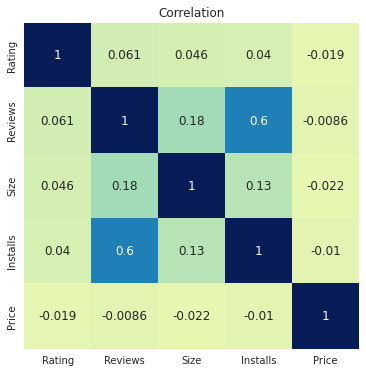

In [ ]:
# calculating correlation between each pair of variable
corr_matrix = apps_data.corr()

# Correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", cbar=False,
            vmin=-0.2, vmax=1, annot_kws={"size": 12})

plt.title("Correlation");

### **Observation:**


*   Installs and Reviews have the strongest correlation. There is no strong correlation found between other features.

*   Price has a negative correlation with all other features but it is very weak and it can be negligible.

*   There is small linear relation of Installs with Size of an app which we will analyze further.


## **Does rating change with increasing price?**



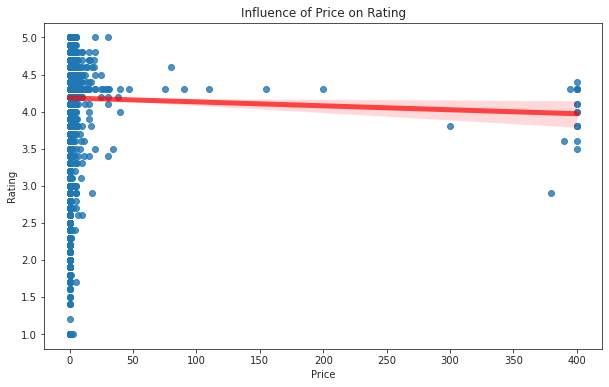

In [ ]:
# setting plot size and background
plt.figure(figsize=(10,6))
sns.set_style("ticks")

# scatterplot Price v/s Rating
sns.regplot(x="Price", y="Rating", data=apps_data, 
            line_kws={"color":"r", "alpha":0.7, "lw":5})

# set title
plt.title("Influence of Price on Rating");

### **Observation:**

* Most of the apps have price below \$100 and above \$350.

* The red linear regression line in above plot indicates there is a negative relation between app price and rating.

* We can conclude that as the price increases their is a slight drop in ratings of the app.

## **Does the size of an app influence the number of downloads?**


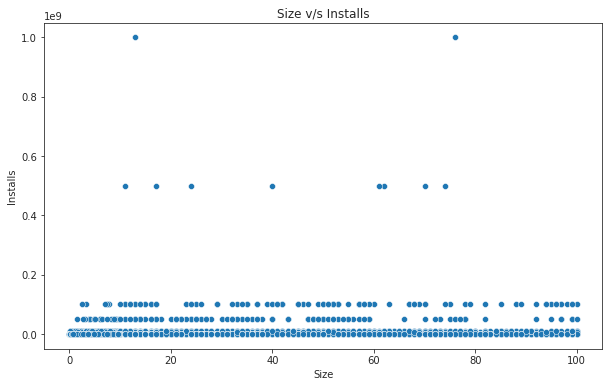

In [ ]:
# scatter plot Size v/s Installs
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x="Size", y="Installs", data=apps_data)
plt.title("Size v/s Installs");

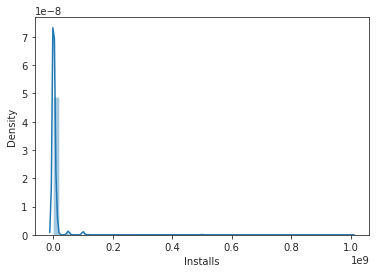

In [ ]:
# distrbution of installs
sns.distplot(apps_data['Installs']);

We have columns like Installs which range from 0 to 1,000,000,000, and even more; while Size column which ranges from 0 to 100(at the most). Thus, number of Installs are more times larger than Size.

We can observe that Installs are highly skewed and its difficult from above to find any correlation of Size and Installs. So, to give importance to both Size, and Installs, we need feature transformation.

The **Log Transform** is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

This transformation reduces the impact of both too-low as well as too-high values.

In [ ]:
# Log Trasformation of column Installs 
apps_data["log_installs"] = np.log(apps_data["Installs"])
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363


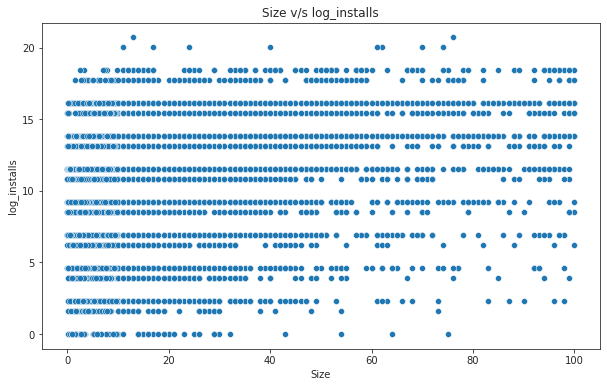

In [ ]:
# scatter plot Size v/s log_installs
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size", y="log_installs", data=apps_data)

# set title
plt.title("Size v/s log_installs");

### **Observation:**

*   Apps having Size between 0 to 20 are installed more as observed from above.

*   Looking at the plot the apps with large size are installed less as compared to small sized apps.

*   Users prefer apps that require less space and load faster. We can conclude that app size may influence the number of installations of the app.



## **Do higher rated apps attract more users?**

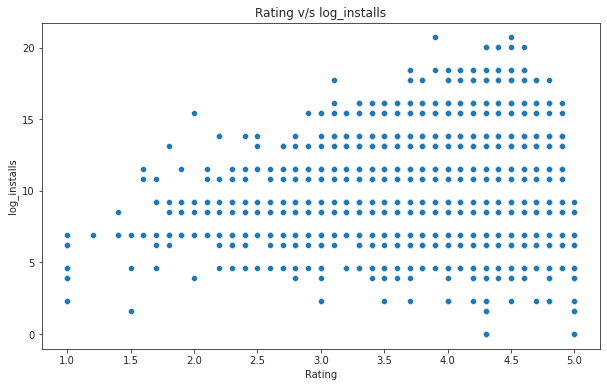

In [ ]:
# scatter plot Rating v/s log_installs
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="Rating", y="log_installs", data=apps_data)

# set title
plt.title("Rating v/s log_installs");

### **Observation:**


*   Above graph shows positive relationship between Rating and Installation.

*   The higher rating does contribute to more installations. 

*   People have a natural tendency to trust the opinion of those around them. This is the reason why users prefer highly rated apps to download.

*   Why are there apps with high ratings but low installation? It seems those apps are good but few people have used them.

## **How reviews affect users decision to download apps?**

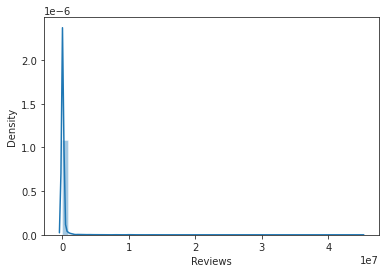

In [ ]:
# distribution of Reviews
sns.distplot(apps_data['Reviews']);

In [ ]:
# log transformation of Reviews column
apps_data['log_reviews'] = np.log(apps_data['Reviews'])
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs,log_reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363,6.874198


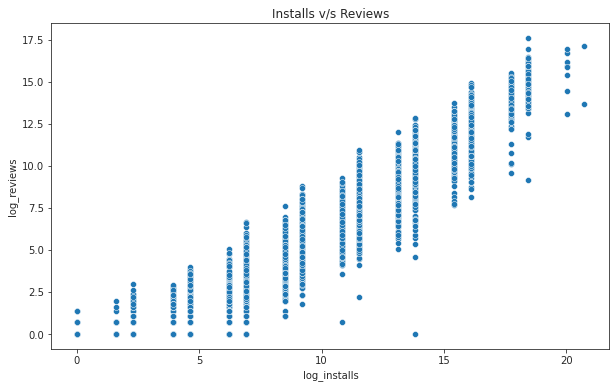

In [ ]:
# scatter plot installs v/s reviews
plt.figure(figsize=(10,6))

sns.scatterplot(x="log_installs", y="log_reviews", data=apps_data)
plt.title("Installs v/s Reviews");


### **Observation:**

*   Graph shows incremental positive relation between Reviews and Installs. 

*   We can say that popular apps which have high number of installs receive more reviews and this attracts more new users.

* When app store visitors want to know if an app does what it’s supposed to do and works well, they’ll check the reviews.

## **Are app updates important?**

In [ ]:
# getting year of update
apps_data['Update_Year'] = pd.DatetimeIndex(apps_data['Last Updated']).year
apps_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,log_installs,log_reviews,Update_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,9.210340,5.068904,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,13.122363,6.874198,2018


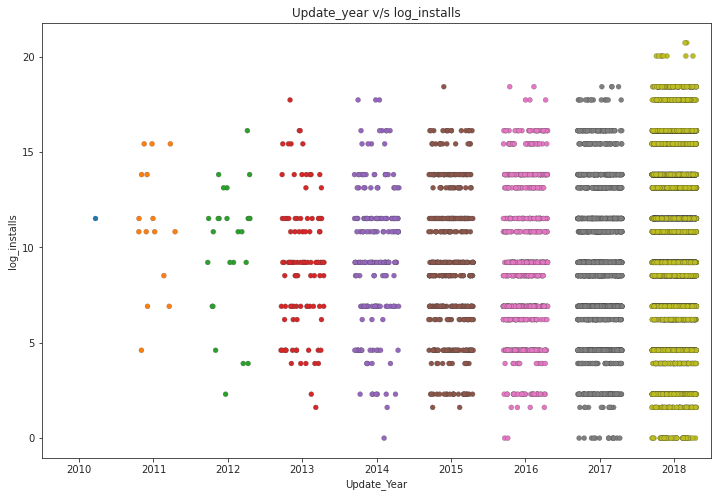

In [ ]:
# stripplot Update_year v/s log_installs
plt.figure(figsize=(12,8))

sns.stripplot(data =apps_data, x="Update_Year", y="log_installs", 
              jitter=0.3, size=5, linewidth=.2)

plt.title("Update_year v/s log_installs");

### **Observation:**

*    We can see from above plot that most of the apps get frequent updates and they are also installed more. 

*   There are very less apps which got updates in 2010, 2011 and 2012 year.

*   We can say that those developers who make their app better over period of time have great chance of success.

## **Enriching data**

For further analysis we will need some more data which we will get from the secondary dataset which contains the information about the reviews given by the users for the apps.
But before using it we should have a glance at the dataset and do neccesary steps for making the dataset more usefull.


Let's have a look at the reviews dataset.

In [ ]:
# copying the dataset for cleaning and analysis
reviews_data = raw_reviews_df.copy()

In [ ]:
# top 5 rows
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# basic info
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


User reviews dataset contain 5 columns namely App, Translated Review, Sentiment, Sentiment Polarity and Sentiment Subjectivity. Different users express their thoughts and feelings about the app and they are stored in the Translated_Review column and by analysing the emotion of the text the other three columns are generated.

**Sentiment analysis is the process of detecting positive or negative sentiment in text**. Sentiment column has three unique values namely Positive, Negative and Neutral. It describes the sentiment of the user giving the review.

**Sentiment Polarity indicates how negative or positive the overall review analyzed is.** Anything below a score of 0 we tag as negative, anything above 0 we tag as positive and 0 as neutral.

**Subjectivity quantifies the amount of personal opinion and factual information contained in the text.** The higher subjectivity means that the text contains personal opinion rather than factual information.

### **Cleaning reviews dataset**

In [ ]:
# looking for the missing values
reviews_data.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

The reviews dataset contains a lot of missing values. Since we will work with numeric data and can not predict the value of the missing data, it will be better to drop the rows having missing values.
The column Translated Review won’t be used in analysis, and Sentiment can be identified from the polarity so we can drop both columns as well.

In [ ]:
# droping unnecessary columns and missing values
reviews_data.drop(columns= ["Translated_Review","Sentiment"], axis= 1, inplace= True)
reviews_data.dropna(inplace= True)

In [ ]:
# merging reviews dataset with apps dataset
temp3_df = pd.merge(apps_data, reviews_data, on="App", how ="inner")

## **Sentiment analysis for free and paid apps**

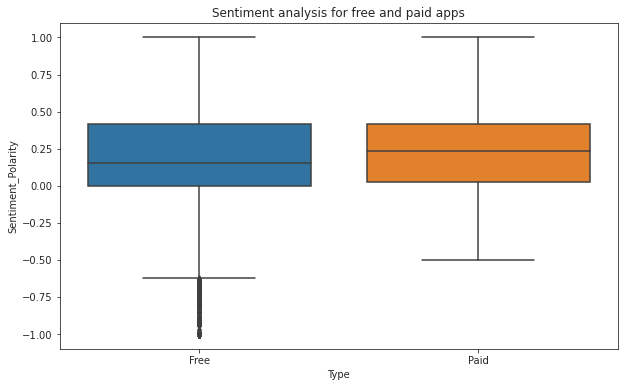

In [ ]:
# setting plot size
plt.figure(figsize=(10,6))

# Boxplot for sentiment analysis
sns.boxplot(x ="Type", y ="Sentiment_Polarity", data= temp3_df)
plt.title("Sentiment analysis for free and paid apps");

### **Observation:**

*   Free app gets more negative reviews as indicated by the outliers on the negative side.

*   Median polarity is higher for paid apps as compared to free apps because users are generally more loyal to Apps they pay for.

*   We can say that paid apps have better quality than free apps.



## **Are sentiment influences the final rating of the app**

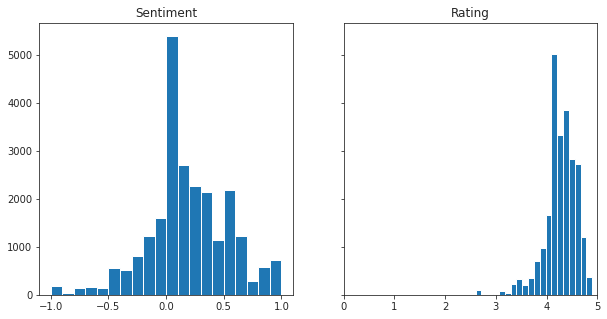

In [ ]:
# create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

# create the histograms
ax[0].hist(temp3_df["Sentiment_Polarity"], bins=20)
ax[1].hist(temp3_df["Rating"], bins=20)
ax[1].set_xlim(0, 5)

# add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

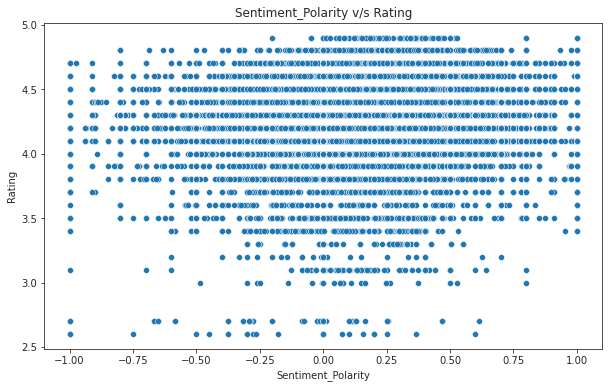

In [ ]:
# scatter plot 
plt.figure(figsize=(10,6))
sns.scatterplot(temp3_df['Sentiment_Polarity'], temp3_df['Rating'])
plt.title("Sentiment_Polarity v/s Rating");

### **Observation:**


*   Looking at the histograms, we can see a positive trend for both columns. In the Sentiment aspect, the majority of the values are above neutral (0), at around 0.2

*   For the Rating column, most of the apps have got ratings above 3.5

* We can say that positive reviews about the app can strengthen new user's decision to download.


# **Conclusion**



After Analyzing the dataset we have got answers to some of the serious & interesting questions which any of the android users would love to know. we have also learned that the following things might affect the rating.
* Rating is depending variable.

*   Whether it’s Free or Paid.
*   Number of the reviews.
*   Sentiment of the review comments.
